# AIR QUALITY DATA ANALYSIS###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import thinkstats2
import thinkplot

from IPython.core import page
page.page = print

In [2]:
df = pd.read_csv("CompletedDataset.csv")
df.head(6)

,City,AQI,Precipitation,GDP,Temperature,Longititute,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48
5,Anyang City,110,672.1,1884.48,15.350685,114.350052,36.096851,71.0,4735,0,36.28,54.51


In [3]:
df.shape

(323, 12)

In [4]:
df.isnull().sum()

City                       0
AQI                        0
Precipitation              0
GDP                        0
Temperature                0
Longititute                0
Latitude                   0
Altitude                   0
PopulationDensity          0
Coastal                    0
GreenCoverageRate          0
Incineration(10,000ton)    0
dtype: int64

In [5]:
df.describe()

,AQI,Precipitation,GDP,Temperature,Longititute,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,75.334365,1081.208978,2394.094241,15.989429,113.985779,31.843767,382.250464,2596.560372,0.247678,38.383096,52.418390
std,42.995735,584.634075,3263.974279,5.029369,7.711894,6.099390,743.219135,2913.835552,0.432334,6.321973,91.976476
min,12.000000,56.100000,22.500000,-2.500000,80.105800,18.234043,-12.000000,1.000000,0.000000,7.600000,1.530000
25%,45.000000,581.000000,761.685000,13.750000,111.060575,27.664188,18.000000,714.000000,0.000000,36.000000,18.875000
50%,69.000000,910.000000,1328.520000,16.515068,115.500183,31.340637,62.000000,1787.000000,0.000000,38.690000,24.000000
75%,102.000000,1651.250000,2722.180000,18.928767,119.867274,36.419417,354.500000,3509.000000,0.000000,42.675000,37.630000
max,296.000000,2478.100000,24964.990000,27.447945,129.598496,49.220000,4505.000000,25900.000000,1.000000,76.490000,686.670000


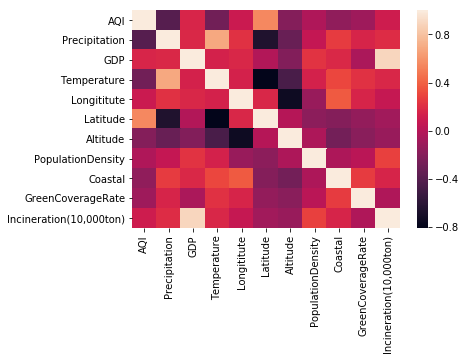

In [6]:
sns.heatmap(df.corr())

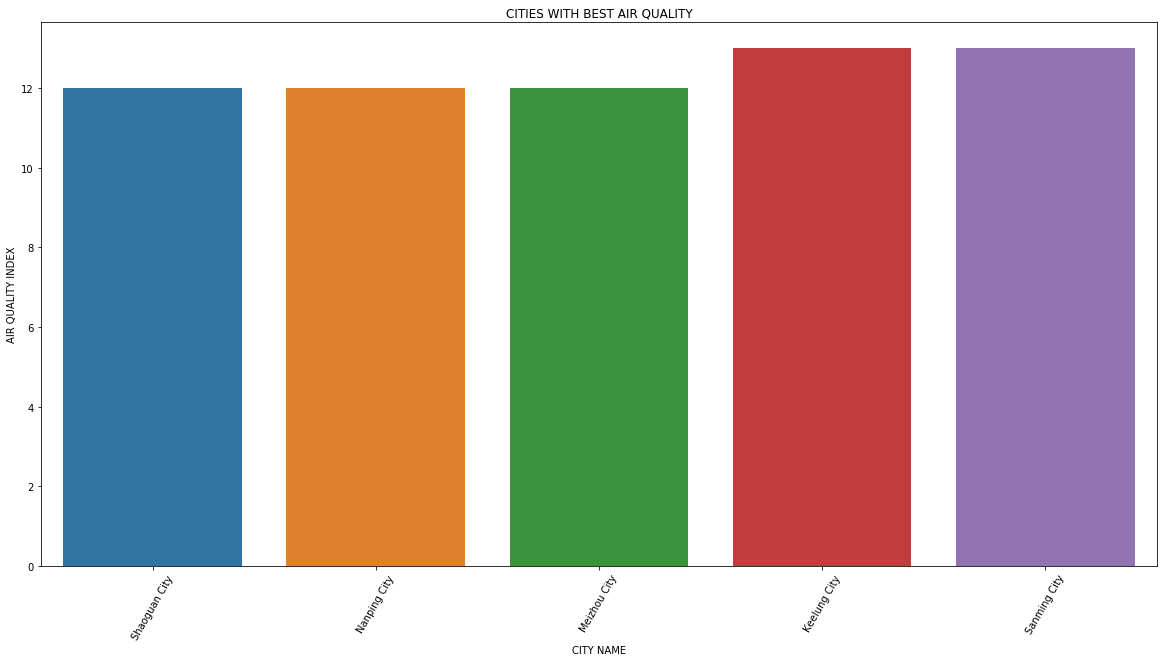

In [68]:
dictionary={"CITY":df.City,"AIR_QUALITY_INDEX":df.AQI}
AirQuality=pd.DataFrame(dictionary)
AirQuality=AirQuality.sort_values("AIR_QUALITY_INDEX",ascending=True)

TOP=AirQuality.head(5)

plt.figure(figsize=(20,10))
sns.barplot(x=TOP.CITY,y=TOP.AIR_QUALITY_INDEX)
plt.xticks(rotation=60)
plt.ylabel("AIR QUALITY INDEX")
plt.xlabel("CITY NAME")
plt.title("CITIES WITH BEST AIR QUALITY")
plt.show()

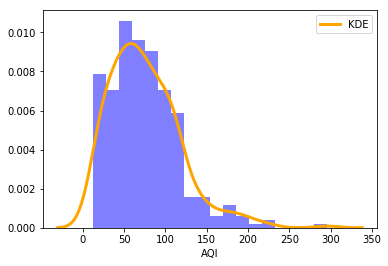

In [8]:
sns.distplot(df['AQI'],color='Blue',hist_kws={'alpha':0.5,'linewidth': 1}, kde_kws={'color': 'orange', 'lw': 3, 'label': 'KDE'})


In [104]:
subset_attributes = ['Altitude', 'PopulationDensity', 'GreenCoverageRate', 'Incineration(10,000ton)']
E = round(df[(df.AQI >= 0) & (df.AQI <= 50)][subset_attributes].describe(),2)
G = round(df[(df.AQI >= 51) & (df.AQI <= 100)][subset_attributes].describe(),2)
LP = round(df[(df.AQI >= 101) & (df.AQI <= 150)][subset_attributes].describe(),2)
MP = round(df[(df.AQI >= 151) & (df.AQI <= 200)][subset_attributes].describe(),2)
HP = round(df[(df.AQI >= 201) & (df.AQI <= 300)][subset_attributes].describe(),2)

pd.concat([E, G, LP, MP, HP], axis=1, keys=[ 'Excellent Quality Air','Good Quality Air', 'Lightly Polluted Air', 'Moderately Polluted Air', 'Heavily Polluted Air'])

Excellent Quality Air                                      \
                   Altitude PopulationDensity GreenCoverageRate   
count                103.00            103.00            103.00   
mean                 659.87           2728.17             39.05   
std                 1126.96           3698.50              8.02   
min                  -12.00              1.00              7.60   
25%                   16.50            500.00             36.00   
50%                   61.00           1905.00             39.80   
75%                  907.00           3404.00             43.17   
max                 4505.00          25900.00             76.49   

                              Good Quality Air                    \
      Incineration(10,000ton)         Altitude PopulationDensity   
count                  103.00           136.00            136.00   
mean                    53.39           279.52           2520.60   
std                    111.59           460.11           2374.12   
min                      1.53             1.00              1.00   
25%                     16.38            16.75            800.50   
50%                     23.00            52.00           1795.50   
75%                     29.00           335.75           3585.75   
max                    613.85          2263.00           9952.00   

                                                Lightly Polluted Air  \
      GreenCoverageRate Incineration(10,000ton)             Altitude   
count            136.00                  136.00                66.00   
mean              38.28                   44.29               227.85   
std                5.51                   61.39               327.93   
min               17.12                    7.18                 3.00   
25%               35.88                   18.03                24.00   
50%               38.68                   24.00                78.00   
75%               42.97                   36.74               298.75   
max               48.39                  440.03              1526.00   

                                                                   \
      PopulationDensity GreenCoverageRate Incineration(10,000ton)   
count             66.00             66.00                   66.00   
mean            2575.03             38.13                   59.03   
std             2294.01              5.16                   86.77   
min              120.00             19.38                    6.86   
25%              780.50             34.29                   23.00   
50%             1919.00             38.75                   29.20   
75%             3521.00             41.99                   47.14   
max            11366.00             50.82                  421.66   

      Moderately Polluted Air                                      \
                     Altitude PopulationDensity GreenCoverageRate   
count                   14.00             14.00             14.00   
mean                   157.66           2696.21             35.99   
std                    226.51           4110.66              4.26   
min                      2.00             89.00             29.00   
25%                     19.98            597.50             34.15   
50%                     78.65            802.00             36.00   
75%                    152.75           2006.75             36.56   
max                    836.00          15055.00             44.93   

                              Heavily Polluted Air                    \
      Incineration(10,000ton)             Altitude PopulationDensity   
count                   14.00                 4.00              4.00   
mean                    51.34                59.85           1797.00   
std                     55.64                72.33           1891.35   
min                     15.86                17.20            309.00   
25%                     25.06                21.55            843.75   
50%                     27.44                27

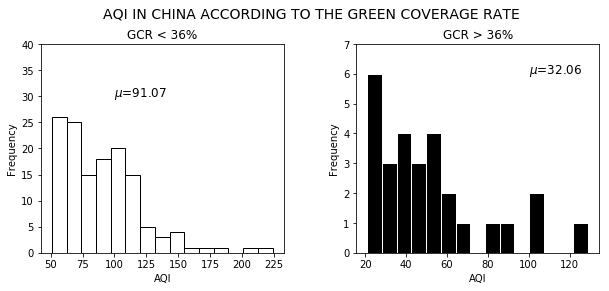

In [144]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("AQI IN CHINA ACCORDING TO THE GREEN COVERAGE RATE", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
df2 = df[(df['GreenCoverageRate'] > 36) &(df['AQI'] > 50)]
df3 = df[(df['GreenCoverageRate'] <= 36)&(df['AQI'] <= 50)]
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("GCR < 36%")
ax1.set_xlabel("AQI")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 40])
ax1.text(100, 30, r'$\mu$='+str(round(df2['AQI'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(df2['AQI'], color='white', bins=15,
                                    edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("GCR > 36%")
ax2.set_xlabel("AQI")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0,7 ])
ax2.text(100, 6, r'$\mu$='+str(round(df3['AQI'].mean(),2)),fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(df1['AQI'], color='black', bins=15,
 edgecolor='white', linewidth=1)

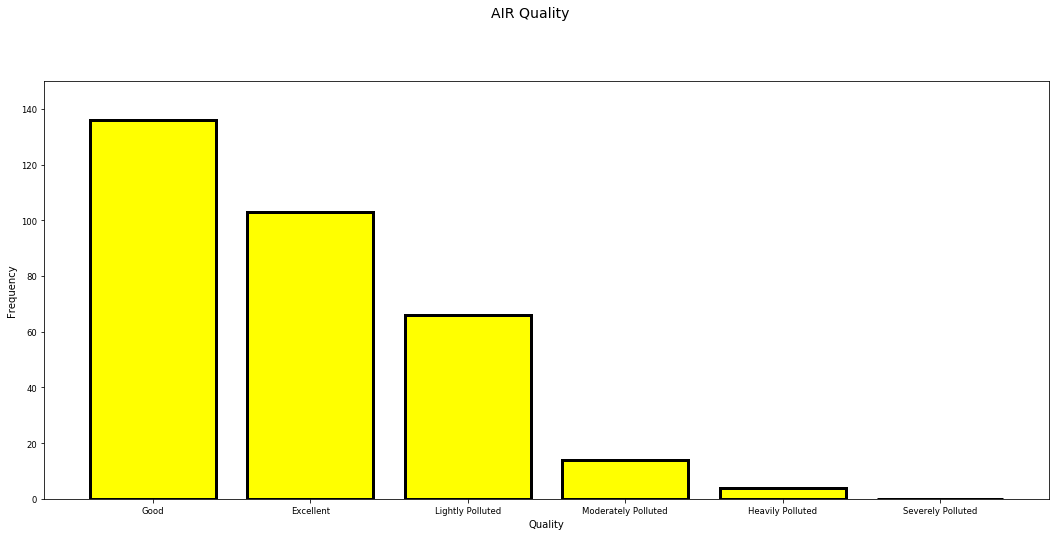

In [178]:
# For 1st Graph
fig = plt.figure(figsize = (18, 8))
title = fig.suptitle("AIR Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)

ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = df['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 150])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='yellow',
        edgecolor='black', linewidth=3)




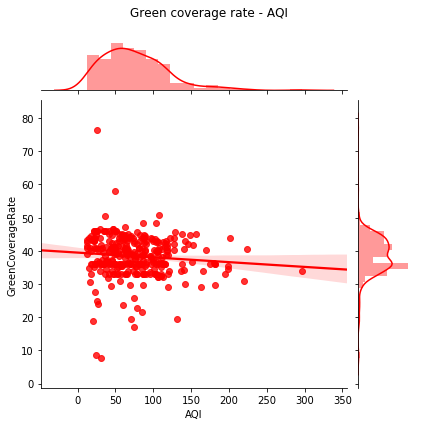

In [9]:
# For red wine
rj = sns.jointplot(x='AQI', y='GreenCoverageRate', data=df,
                   kind='reg',
                   color='red')

fig = rj.fig 
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Green coverage rate - AQI', fontsize=12)

# For white wine


In [164]:
df['quality'] = df['AQI'].apply(lambda value: 'Excellent'
  if value <= 50 else 'Good'
  if value <= 100 else 'Lightly Polluted'
  if value <= 150 else 'Moderately Polluted'
  if value <= 200 else 'Heavily Polluted'
  if value <= 300 else 'Severely Polluted'
                                   )
df['quality'] = pd.Categorical(df['quality'],categories=['Excellent','Good','Lightly Polluted', 'Moderately Polluted', 'Heavily Polluted',  'Severely Polluted' ])

In [180]:
df.head(6)

,City,AQI,Precipitation,GDP,Temperature,Longititute,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)",quality
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00,Excellent
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00,Lightly Polluted
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00,Good
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00,Excellent
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48,Good
5,Anyang City,110,672.1,1884.48,15.350685,114.350052,36.096851,71.0,4735,0,36.28,54.51,Lightly Polluted


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


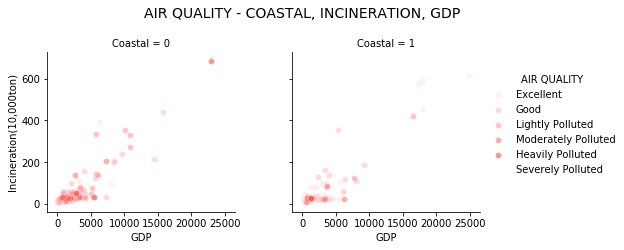

In [143]:
g = sns.FacetGrid(df, col="Coastal", hue='quality', size=3.5, palette=sns.light_palette('red', 6)
                      )
g.map(plt.scatter, "GDP", "Incineration(10,000ton)", alpha=0.5, 
      edgecolor='white', linewidth=0.5)


fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('AIR QUALITY - COASTAL, INCINERATION, GDP', fontsize=14)
l = g.add_legend(title='AIR QUALITY')